In [1]:
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), '..', ''))
sys.path.append(project_path)


In [2]:
from python.python_code.data_manip.extraction.telemac_file import TelemacFile
from python.create_dgl_dataset import add_mesh_info

mesh_list = ['./datas/maillage_3.slf']
res_mesh = TelemacFile(mesh_list[0])
X,triangles = add_mesh_info(res_mesh)

# Prepare grid points
# Define your domain bounds and grid resolution
#xmin = min(X[:, 0].min(), X[:, 0].min())
#xmax = max(X[:, 0].max(), X[:, 0].max())
#ymin = min(X[:, 1].min(), X[:, 1].min())
#ymax = max(X[:, 1].max(), X[:, 1].max())
#Nx, Ny = 700, 700  # Adjust as needed

#grid_x, grid_y = np.mgrid[xmin:xmax:Nx*1j, ymin:ymax:Ny*1j]
#grid_points = np.vstack((grid_x.ravel(), grid_y.ravel())).T  # Shape: (n_grid_points, 2)
grid_points = X





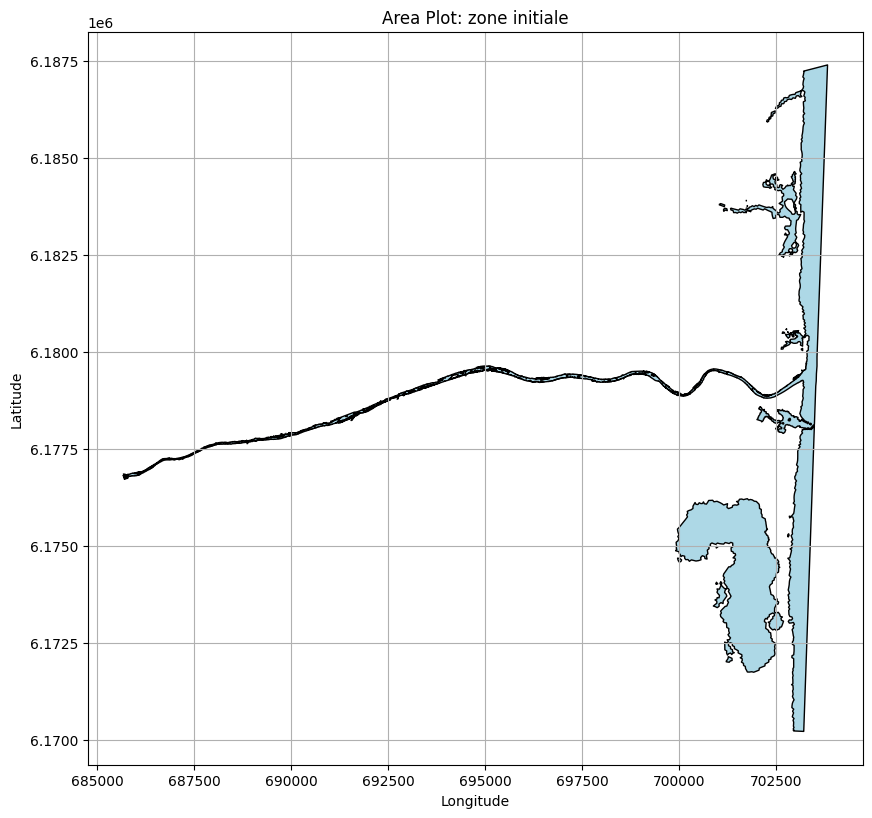

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt

# Step 1: Load the area polygon
area_gdf = gpd.read_file("./datas/filtered_polygon.shp")  # Replace with your file path
area_polygon = area_gdf.unary_union  # Combine multiple polygons if needed


area_gdf.plot(figsize=(10, 10), color='lightblue', edgecolor='black')

plt.title("Area Plot: zone initiale")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()
    
mask = np.array([area_polygon.contains(Point(x, y)) for x, y in grid_points])




In [5]:
from shapely.geometry import MultiPoint, Point

# Step 1: Load the polygons
area_gdf = gpd.read_file("./datas/filtered_polygon.shp")  # Replace with your file path

# Step 2: Convert grid points to a GeoDataFrame
grid_points_gdf = gpd.GeoDataFrame(
    geometry=[Point(x, y) for x, y in grid_points], 
    crs=area_gdf.crs  # Use the same CRS as your polygons
)

# Step 3: Perform a spatial join (vectorized point-in-polygon check)
# This joins each grid point to the polygon it falls in (if any)
grid_points_gdf = gpd.sjoin(grid_points_gdf, area_gdf, how="left", predicate="within")

# Step 4: Create a mask for points inside polygons
mask = ~grid_points_gdf.index_right.isna()

# Step 5: Apply the mask
inside_points = grid_points[mask]
outside_points = grid_points[~mask]


In [6]:
mask = mask.to_numpy()

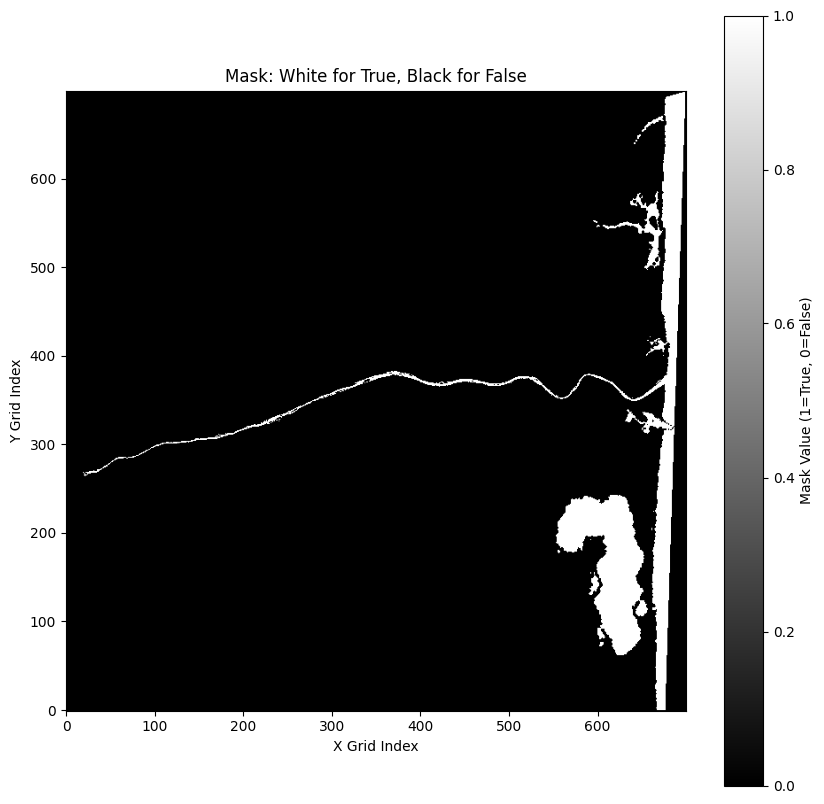

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd

# Assuming the data for `grid_points` and `mask` already exists from your code snippet.

# Create a blank white canvas and set pixels to black where mask is False
# Get grid dimensions
Nx, Ny = 700, 700  # Same grid resolution as defined in your code

# Reshape the mask to match grid shape
mask_reshaped = mask.reshape(Nx, Ny)

# Plot the mask as an image
plt.figure(figsize=(10, 10))
plt.imshow(mask_reshaped.T, origin='lower', cmap='gray')  # Flip vertically with `origin='lower'`
plt.title("Mask: White for True, Black for False")
plt.xlabel("X Grid Index")
plt.ylabel("Y Grid Index")
plt.colorbar(label="Mask Value (1=True, 0=False)")
plt.show()


In [7]:
np.save("./datas/mask_irregylar.npy", mask)


In [10]:
sum(mask)

58828